In [10]:
import numpy as np
from random import choice
from matplotlib import pyplot as plt

sigmoid = lambda x: 1/(1+np.exp(-x))
sigmoid_prime = lambda z: z * (1 - z)

tanh = lambda x: np.sinh(x) / np.cosh(x)
tanh_prime = lambda z: 1 - np.power(z, 2)

In [15]:
class NeuralNetwork():
    def __init__(self, layers, activation='sigmoid'):
        self.layers = layers
        if activation == 'sigmoid':
            self.activation = sigmoid
            self.activation_prime = sigmoid_prime
        else:
            self.activation = tanh
            self.activation_prime = tanh_prime

        ws = []
        for i in range(len(layers) - 2):
            w = np.random.rand(layers[i]+1, layers[i + 1]+1 )
            ws.append(w)
        w = np.random.rand(layers[-2]+1, layers[-1])
        ws.append(w)
        self.weights = ws
        self.As = []

    
    def fit(self, X, y, learning_rate=0.2, steps=100000, tol=1e-2):
        origin = X
        
        ones = np.ones((len(X), 1), dtype=X.dtype)
        X_bias = np.hstack((X, ones))
        X = X_bias
        training_data = list(zip(X.tolist(), y))

        for step in range(steps):
            # randomly choose train data from X with bias
            x, target = choice(training_data)
            # forward propagation
            z = self.forward_prop(x)
            # backward propagation
            self.back_prop(x, target, z, learning_rate)

            # first & every 2000 steps will print out and check RMS error
            if step == 0 or step % 2000 == 0:
                print('step:', step)
                err = self.find_RMS_error(X, y)
                if err < tol:
                    print('NN training succeeded!')
                    # boundaries separated into two classes 1000 random pairs, classify colored ones
                    self.visual_NN_boundaries()
                    self.visual_NN_boundaries_hard(threshold=0.5)
                    break
            
            # training failed
            if step == steps - 1:
               err = self.find_RMS_error(X, y)
               if err > tol:
                   print('NN training failed.')

    
    def predict(self, X):
        return self.forward_prop(X)

    
    def find_RMS_error(self, X, y):
        print('Training Results(data, prediction, expected):')
        prediction = self.predict(X)
        y = y.reshape(-1, 1)  
        err = np.sqrt(np.mean(np.square(prediction - y)))
        for i, x in enumerate(X):
            print(x[1:], prediction[i], y[i])
        print('RMS_err: ', err)
        print()
        return err


    def visual_NN_boundaries(self, Nsamp=2000):
        result = []
        x_s = np.random.rand(Nsamp, 2)
        ones = np.ones((len(x_s), 1), dtype=X.dtype)
        X_bias = np.hstack((x_s, ones))
        result.append(self.forward_prop(X_bias))
        plt.scatter( x_s[:,0], x_s[:,1], c=result )
        plt.show()

    
    def visual_NN_boundaries_hard(self, Nsamp=2000, threshold=0.5):
        x_s = np.random.rand(Nsamp, 2)
        ones = np.ones((len(x_s), 1), dtype=X.dtype)
        X_bias = np.hstack((x_s, ones))
        # comparison between threshold and z values
        result = np.array(self.forward_prop(X_bias)) > threshold        
        plt.scatter( x_s[:,0], x_s[:,1], c=result )
        plt.show()
        
    
    def forward_prop(self, x):
        x = np.atleast_2d(x)
        A_values = [x]
        z = x
        for w in self.weights:
            dot = np.dot(z, w)
            z = self.activation(dot)
            A_values.append(z)
        # last value should be returned as z
        self.As = A_values[:-1]
        return z

    
    def back_prop(self, x, y, z, alpha):
        delta = []
        # now last index becomes 0
        reversed_weights = self.weights[::-1]
        reversed_as = self.As[::-1]

        for i, w in enumerate(reversed_weights):
            # for z (output)
            if i == 0:
                error = (y - z)
                delta = error * self.activation_prime(z)
                delta_w = delta * reversed_as[i] * alpha
                w += delta_w.T
                reversed_weights[i] = w
            # middle layers
            else:
                delta = np.dot(delta, reversed_weights[i - 1].T) * self.activation_prime(reversed_as[i - 1])
                A = np.atleast_2d(reversed_as[i])
                delta_w = np.dot(A.T, delta) * alpha
                w += delta_w
                reversed_weights[i] = w
        # revert into original 
        self.weights = reversed_weights[::-1]
        self.As = reversed_as[::-1]


step: 0
Training Results(data, prediction, expected):
[0 1] [0.21837278] [0]
[1 1] [0.63628262] [1]
[0 1] [0.63955654] [1]
[1 1] [0.80445603] [0]
RMS_err:  0.48914363641493475

step: 2000
Training Results(data, prediction, expected):
[0 1] [0.00104678] [0]
[1 1] [0.96401963] [1]
[0 1] [0.95956373] [1]
[1 1] [0.00208257] [0]
RMS_err:  0.027088335828430857

step: 4000
Training Results(data, prediction, expected):
[0 1] [0.00083216] [0]
[1 1] [0.9790487] [1]
[0 1] [0.97857066] [1]
[1 1] [0.00141803] [0]
RMS_err:  0.015007306162459523

step: 6000
Training Results(data, prediction, expected):
[0 1] [0.00078476] [0]
[1 1] [0.98410786] [1]
[0 1] [0.98389492] [1]
[1 1] [0.00120076] [0]
RMS_err:  0.011335686466223691

step: 8000
Training Results(data, prediction, expected):
[0 1] [0.00016535] [0]
[1 1] [0.98659422] [1]
[0 1] [0.9867136] [1]
[1 1] [0.00292765] [0]
RMS_err:  0.009550418352744165

NN training succeeded!


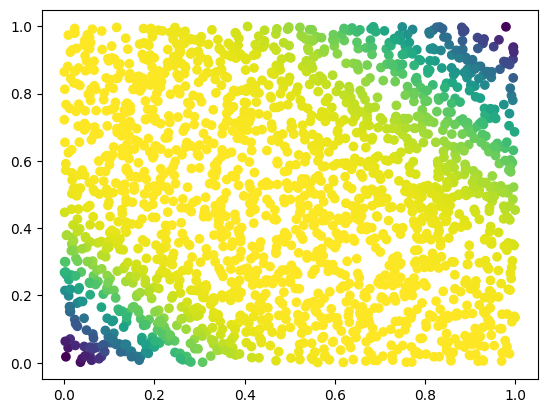

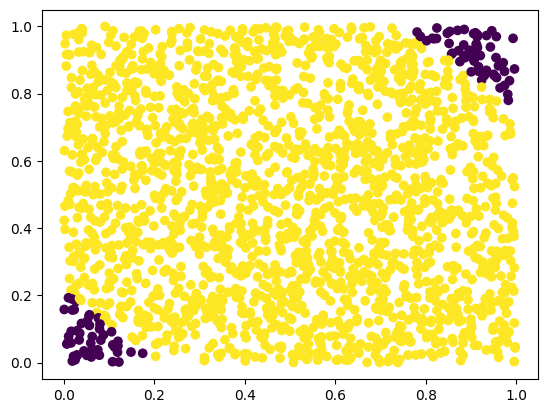

In [16]:
nn = NeuralNetwork([2,2,1], activation='tanh')

X = np.array([[0, 0], 
              [0, 1],
              [1, 0],
              [1, 1]])

y = np.array([0, 1, 1, 0])

nn.fit(X, y, learning_rate=0.2, steps=100000)


step: 0
[0. 1.] [0.36400583] [0]
[1. 1.] [0.50279666] [0]
[1. 1.] [0.56210121] [0]
[0.5 1. ] [0.45644184] [1]
[0. 1.] [0.55883841] [1]
[1. 1.] [0.60100424] [1]
RMS_err:  0.47443635474941126

step: 2000
[0. 1.] [0.08885684] [0]
[1. 1.] [-0.17505205] [0]
[1. 1.] [-0.00663232] [0]
[0.5 1. ] [0.85620038] [1]
[0. 1.] [0.97528975] [1]
[1. 1.] [0.76889939] [1]
RMS_err:  0.13740400529505595

step: 4000
[0. 1.] [0.00920842] [0]
[1. 1.] [-0.06216735] [0]
[1. 1.] [0.03383306] [0]
[0.5 1. ] [0.95951878] [1]
[0. 1.] [0.98927847] [1]
[1. 1.] [0.96812944] [1]
RMS_err:  0.03620235569618185

step: 6000
[0. 1.] [0.01932416] [0]
[1. 1.] [-0.05115048] [0]
[1. 1.] [0.0166941] [0]
[0.5 1. ] [0.97673924] [1]
[0. 1.] [0.99221009] [1]
[1. 1.] [0.97814457] [1]
RMS_err:  0.0269193014834619

step: 8000
[0. 1.] [-0.01348026] [0]
[1. 1.] [-0.01145877] [0]
[1. 1.] [0.03742084] [0]
[0.5 1. ] [0.97952207] [1]
[0. 1.] [0.99359899] [1]
[1. 1.] [0.98072825] [1]
RMS_err:  0.020595546379250616

step: 10000
[0. 1.] [-0.0014

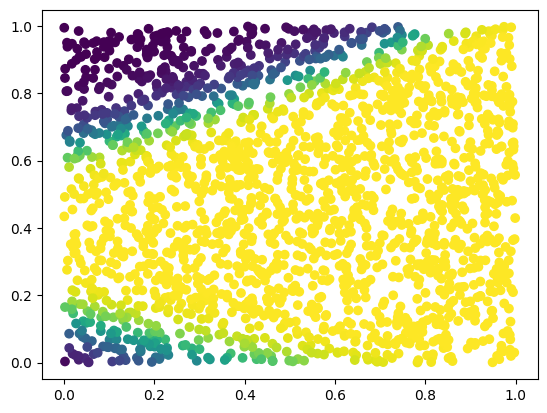

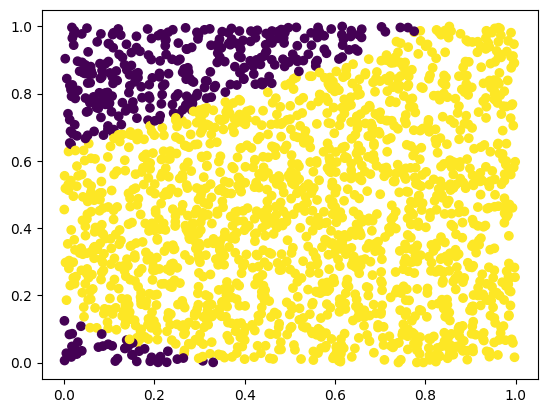

In [9]:
X = np.array([[0, 0],
            [0, 1],
            [0.5, 1],
            [0, 0.5],
            [1, 0],
            [1, 1]])
y = np.array([0, 0, 0, 1, 1, 1])

nn = NeuralNetwork([2,2,2,1], activation='tanh')
nn.fit(X, y, learning_rate=0.2,steps=100000)
